<h1><center>Assignment No 1</center></h1>
<h1><center>Data Understanding and Exploratory Data Analysis</center></h1>


# Guidelines
1. Rename jupyter notebook as **rollnumber_firstname_lastname**.
1. You are only allowed to use pandas, numpy and seaborn libraries.
1. You are supposed to answer the question here on Jupyter notebook. Use markdown cells to answer the questions while use "Code" cells to write the code. You can double click on any markdown cell to edit it and press **shift+enter** to execute any cell.
1. Once finished, go to File menu and download the notebook as .html
1. Make sure all required figures and tables are visible in the HTML file.
1. Submit this HTML file. Note that it must follow the naming convention mentioned above.

# Import Libraries

In [102]:
# Do not modify this cell

import pandas as pd
import numpy as np
import seaborn as sns

# Import Data

In [103]:
# do not modify this cell

train_data = pd.read_csv('data/anneal.data', header=None,  
                         names = ['shape','thick','width','length','oil', 'bore', 'packing', 'classes'], 
                         sep= '\t')

In [104]:
# train_data_backup = train_data
# Old method makes a deep copy
train_data_backup = pd.read_csv('data/anneal.data', header=None,  
                         names = ['shape','thick','width','length','oil', 'bore', 'packing', 'classes'], 
                         sep= '\t')
train_data.head(10)

,shape,thick,width,length,oil,bore,packing,classes
0,COIL,0.700,610.0,0,NaN,0,NaN,3
1,COIL,3.200,610.0,0,NaN,0,NaN,3
2,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,COIL,2.801,385.1,0,NaN,0,NaN,3
4,SHEET,0.801,255.0,269,NaN,0,NaN,3
5,COIL,1.600,610.0,0,NaN,0,NaN,3
6,SHEET,0.699,610.0,4880,Y,0,NaN,3
7,COIL,3.300,152.0,0,NaN,0,NaN,3
8,COIL,0.699,1320.0,0,NaN,0,NaN,3
9,SHEET,1.000,1320.0,762,NaN,0,NaN,3


# Part 1: Filling missing (NaN) values. (8 questions, 5 marks each)
**We have loaded a dataset for you and it's first 10 rows are printed. All below experiments are to be performed on the variable "train_data".**

1. Identify and enlist numerical and categorical attributes.
1. Print summary statistics of the numerical attributes of the data (mean, std, min, 25%, 50%, 75%, max, counts).
1. Write a code below that prints total number of records and total number of attributes of this data.
1. Fill the missing values with using next valid observation. For example, for **oil** column, first 6 rows would be filled with value **Y**. This is known as "backward fill". 
1. What problems would arise if you use "forward fill" instead?
1. Print summary statistics again and comment on the difference (before and after filling missing values).

**Enlist numerical and categorical attributes.**

> Numerical Attributes :
thick, width, length

> Categorical Attributes: 
shape, oil, packing, classes, bore


In [105]:
# Print Summary statistics of numerical attribtues

train_data.describe()

,thick,width,length,bore,packing
count,798.000000,798.000000,798.000000,798.000000,9.000000
mean,1.181847,781.744361,1273.037594,28.195489,2.888889
std,0.861608,404.722346,1886.768139,124.811534,0.333333
min,0.250000,0.000000,0.000000,0.000000,2.000000
25%,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.800000,610.000000,611.000000,0.000000,3.000000
75%,1.600000,1250.000000,762.000000,0.000000,3.000000
max,4.000000,1525.000000,4880.000000,600.000000,3.000000


In [106]:
# Show number of records and number of attributes of the data above

print("Number of records:", train_data.shape[0])
print("Number of attributes:", train_data.shape[1])

Number of records: 798
Number of attributes: 8


In [107]:
# Write code to perform backward fill for all columns. Show first 10 rows.

train_data = train_data.bfill(axis = 'rows')
train_data.head(10)

,shape,thick,width,length,oil,bore,packing,classes
0,COIL,0.700,610.0,0,Y,0,3.0,3
1,COIL,3.200,610.0,0,Y,0,3.0,3
2,SHEET,0.700,1300.0,762,Y,0,3.0,3
3,COIL,2.801,385.1,0,Y,0,3.0,3
4,SHEET,0.801,255.0,269,Y,0,3.0,3
5,COIL,1.600,610.0,0,Y,0,3.0,3
6,SHEET,0.699,610.0,4880,Y,0,3.0,3
7,COIL,3.300,152.0,0,Y,0,3.0,3
8,COIL,0.699,1320.0,0,Y,0,3.0,3
9,SHEET,1.000,1320.0,762,Y,0,3.0,3


# Convert this to a "Markdown" cell and answer the question 5.

Using forward fill would cause the initial NaN values to remain in the dataset.

In [108]:
# Print summary statistics after filling missing values

train_data.describe()

,thick,width,length,bore,packing
count,798.000000,798.000000,798.000000,798.000000,769.000000
mean,1.181847,781.744361,1273.037594,28.195489,2.892068
std,0.861608,404.722346,1886.768139,124.811534,0.310497
min,0.250000,0.000000,0.000000,0.000000,2.000000
25%,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.800000,610.000000,611.000000,0.000000,3.000000
75%,1.600000,1250.000000,762.000000,0.000000,3.000000
max,4.000000,1525.000000,4880.000000,600.000000,3.000000


7. Now use **train_data_backup** and fill missing values by taking mode of each column. Print summary statistics of numerical attributes and comment of the difference (between backward fill and mode fill).
8. Which method of filling missing values is desirable for this particular data and why?

In [109]:
# Fill missing values of train_data_backup and print summary statistics.

train_data_backup = train_data_backup.apply(lambda x: x.fillna(x.mode()[0]), axis=0)    
train_data_backup.describe()

,thick,width,length,bore,packing
count,798.000000,798.000000,798.000000,798.000000,798.000000
mean,1.181847,781.744361,1273.037594,28.195489,2.998747
std,0.861608,404.722346,1886.768139,124.811534,0.035400
min,0.250000,0.000000,0.000000,0.000000,2.000000
25%,0.601000,609.900000,0.000000,0.000000,3.000000
50%,0.800000,610.000000,611.000000,0.000000,3.000000
75%,1.600000,1250.000000,762.000000,0.000000,3.000000
max,4.000000,1525.000000,4880.000000,600.000000,3.000000


# Comment on which method is better and why.

Using backward or forward fill would leave some null values in the dataset. Using mode fill would completely fill all the null values in the dataset. For example, there are 769/798 non-null values with backward fill, whereas mode fill has filled all 798 values.
Mode fill is better for this data set because it produces 0 null values, and mean and standard deviation of the `packing` column does not change much.

# Part 2: Correlation, Covariance and Heatmaps (4 questions, 5 marks each)
**In this data, you are provided gender income data. Your job is to find correlation and covariance between attributes.**

In [110]:
gender_data = pd.read_csv("data/gender_data.csv", sep = ',')

In [111]:
gender_data.head()

,Gender,Age,Income,City
0,F,28,90000,khi
1,F,25,75000,lhr
2,F,22,50000,lhr
3,M,27,78000,lhr
4,M,22,50000,lhr


1. Identify "Binary Symmetric Attribute", "Numerical Continuous Attribute", "Numerical Discrete Attribute" and "Categorical Discrete Attribute".
1. Write a code to convert all categorical attributes to numerical attributes (you may use dictionary to map the values to integers).
1. Write code to calculate correlation matrix and visualize it using a heatmap. Note that if you have sucessfully converted all the attributes to numerical variables, you will get a 4x4 matrix. Comment on the results. In particularly, answer the following.
 1. Does the choice of city of employment makes an impact on the earning of a particular gender?
 1. Does income variable depends on age variable?
1. Write code to calculate covariance matrix and print it. Comment on the results. What does covariance signify with respect to this dataset?


**Write down the attributes you have identified.**




Binary Symmetric Attribute: Gender   
Numerical Continuous Attribute: Income   
Numerical Discrete Attribute: Age   
Categorical Discrete Attribute: City   

In [112]:
# Code to convert attributes

gender_data['Gender'] = gender_data['Gender'].replace(['F','M'], [0,1])
gender_data['City'] = gender_data['City'].replace(['lhr', 'khi', 'isb'], [0, 1, 2])

In [113]:
# Calculate correlation

correlation = gender_data.corr()

(4, 0)

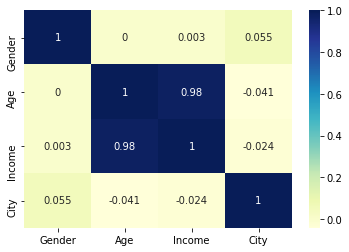

In [114]:
# Heatmap Sample

ax = sns.heatmap(correlation, annot=True, cmap="YlGnBu")
# Bottom and top of the heatmap were getting cropped due to a bug
# This fixes that
ax.set_ylim(4, 0)

**Comments on the Heatmap above**




The heatmap of correlation shows that `Gender` and `Age` are independent of one another. Similarly 0.003 value of correlation between `Gender` and `Income` shows that these values are also independent. Similarly `Gender` and `City` are also relatively independent.
`Age` and `Income` are highly dependent (income increases with age). `Age` and `City` are relatively independent. 
`Income` and `City` also have correlation of approximately 0, thus are also independent.

In [115]:
# Caclulate covariance matrix and print it (4x4 matrix)

covariance = gender_data.cov()
print(covariance)

           Gender           Age        Income        City
Gender   0.255814      0.000000  2.325581e+01    0.023256
Age      0.000000      5.412262  3.460465e+04   -0.080338
Income  23.255814  34604.651163  2.313256e+08 -302.325581
City     0.023256     -0.080338 -3.023256e+02    0.695560


**Comments on the Covariance**





The value of covariance between `Gender` and `Age` is 0. So there is not any relation between the two. The value of covariance between `Gender` and `Income` is greater than 0. Males were assigned 1 when converted to numerical attribute. So this indicates that Male are being paid higher. Similarly, the covariance between `Gender` and `City` is almost 0. Thus, there is not any significant relatiom between the two.
`Age` and `Income` have a very high covariance, which indicates that `Income` increases with `Age`. `Age` and `City` have almost 0 covariance, showing almost no relation.
Since `City` and `Income` have a high negative covariance, it show that city 0 (lhr) is highest paid while city 2 (isb) is lowest paid.